# 1) A) Loading Data for Zip codes in Bournemouth

In [1]:
import pandas as pd
import requests

In [3]:
!wget -O 'temp.zip' https://www.getthedata.com/downloads/open_postcode_geo.csv.zip
!unzip -f temp.zip 
!rm temp.zip 

df1_zip = pd.read_csv('open_postcode_geo.csv', names=["postcode","status","usertype","easting","northing","positional_quality_indicator","country","latitude","longitude","postcode_no_space","postcode_fixed_width_seven","postcode_fixed_width_eight","postcode_area","postcode_district","postcode_sector","outcode","incode"])
df1_zip.head()

    

--2020-07-05 16:01:05--  https://www.getthedata.com/downloads/open_postcode_geo.csv.zip
Resolving www.getthedata.com (www.getthedata.com)... 95.154.195.188
Connecting to www.getthedata.com (www.getthedata.com)|95.154.195.188|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64607200 (62M) [application/zip]
Saving to: ‘temp.zip’

100%[======================================>] 64,607,200   107MB/s   in 0.6s   

2020-07-05 16:01:06 (107 MB/s) - ‘temp.zip’ saved [64607200/64607200]

Archive:  temp.zip


,postcode,status,usertype,easting,northing,positional_quality_indicator,country,latitude,longitude,postcode_no_space,postcode_fixed_width_seven,postcode_fixed_width_eight,postcode_area,postcode_district,postcode_sector,outcode,incode
0,AB1 0AA,terminated,small,385386,801193,1,Scotland,57.101474,-2.242851,AB10AA,AB1 0AA,AB1 0AA,AB,AB1,AB1 0,AB1,0AA
1,AB1 0AB,terminated,small,385177,801314,1,Scotland,57.102554,-2.246308,AB10AB,AB1 0AB,AB1 0AB,AB,AB1,AB1 0,AB1,0AB
2,AB1 0AD,terminated,small,385053,801092,1,Scotland,57.100556,-2.248342,AB10AD,AB1 0AD,AB1 0AD,AB,AB1,AB1 0,AB1,0AD
3,AB1 0AE,terminated,small,384600,799300,8,Scotland,57.084444,-2.255708,AB10AE,AB1 0AE,AB1 0AE,AB,AB1,AB1 0,AB1,0AE
4,AB1 0AF,terminated,large,384460,800660,8,Scotland,57.096656,-2.258102,AB10AF,AB1 0AF,AB1 0AF,AB,AB1,AB1 0,AB1,0AF


In [43]:
df_bournemouth_active = df1_zip.loc[(df1_zip['status'] == 'live') & (df1_zip['country'] == 'England') & (df1_zip['postcode_area']=='BH')]
#[[df1_zip['status'] == 'live'] && [df1_zip['country'] == 'England']

In [44]:
df_bournemouth_active.shape

(15188, 17)

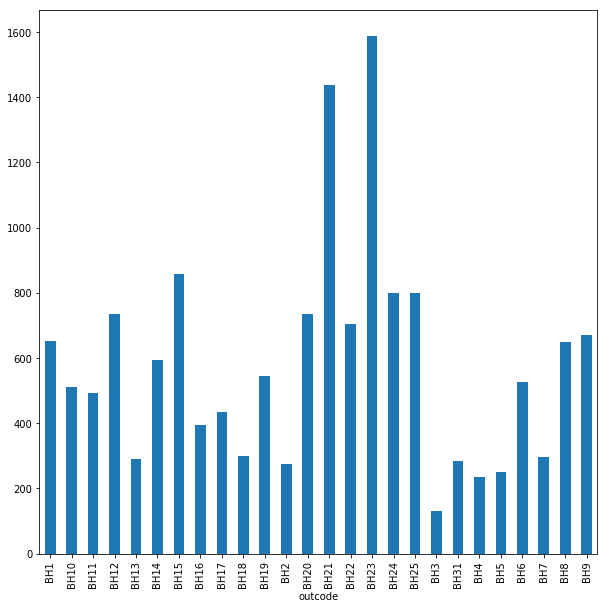

In [49]:
df_bournemouth_active.sort_values(by='outcode').groupby('outcode')['postcode'].count().plot(kind='bar', figsize =(10,10))